In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def normalize_by_groups(df, group_by_prefix_level=2):
    groups = {}
    for col in df.columns:
        prefix = "_".join(col.split("_")[:group_by_prefix_level])
        if prefix not in groups:
            groups[prefix] = []
        groups[prefix].append(col)
    
    scaler = StandardScaler()
    normalized_groups = {}

    for group, cols in groups.items():
        group_data = df[cols]
        normalized_data = scaler.fit_transform(group_data)
        normalized_groups[group] = pd.DataFrame(normalized_data, columns=cols)

    normalized_df = pd.concat(normalized_groups.values(), axis=1)
    
    return normalized_df


In [127]:
a = pd.read_csv('all_radiomics_features.csv')
a = a.set_index('SampleID')
index_a = a.index
a = a.add_suffix('_para1')
a = normalize_by_groups(a)
a = a.reset_index()

b = pd.read_csv('all_radiomics_features1.csv')
b = b.set_index('SampleID')
index_b = b.index
b = b.add_suffix('_para2')
b = normalize_by_groups(b)
b = b.reset_index()
c = pd.read_csv('all_radiomics_features2.csv')
c = c.set_index('SampleID')
index_c = c.index
c = c.add_suffix('_para2')
c = normalize_by_groups(c)
c = c.reset_index()

In [128]:
a.index = index_a
b.index = index_b
c.index = index_c
intersection = list(set(index_a) & set(index_b) & set(index_c))
a = a.loc[intersection,:]
b = b.loc[intersection,:]
c = c.loc[intersection,:]
d = pd.concat([a,b,c],axis=1)
del d['index']
d =d.reset_index()
d

,SampleID,original_shape_Elongation_para1,original_shape_Flatness_para1,original_shape_LeastAxisLength_para1,original_shape_MajorAxisLength_para1,original_shape_Maximum2DDiameterColumn_para1,original_shape_Maximum2DDiameterRow_para1,original_shape_Maximum2DDiameterSlice_para1,original_shape_Maximum3DDiameter_para1,original_shape_MeshVolume_para1,...,original_glszm_SmallAreaHighGrayLevelEmphasis_para2,original_glszm_SmallAreaLowGrayLevelEmphasis_para2,original_glszm_ZoneEntropy_para2,original_glszm_ZonePercentage_para2,original_glszm_ZoneVariance_para2,original_ngtdm_Busyness_para2,original_ngtdm_Coarseness_para2,original_ngtdm_Complexity_para2,original_ngtdm_Contrast_para2,original_ngtdm_Strength_para2
0,LUNG1-222,1.259151,0.522960,1.391735,0.802029,1.330188,1.334224,1.510514,1.134925,1.929185,...,-1.324391,2.046515,-3.101165,-2.128353,0.003800,1.589017,-1.002650,-1.311153,-1.053217,-1.155164
1,LUNG1-242,-0.185295,-1.092133,-0.730680,-0.290220,-0.016917,-0.073177,-0.549920,-0.317820,0.967070,...,1.574001,-0.368821,0.806242,0.152888,-0.074428,-0.095583,-0.286679,0.118979,-0.612030,-0.056140
2,LUNG1-277,-0.193177,-0.274078,-0.458593,-0.387023,-0.192714,-0.628579,-0.292234,-0.473687,-0.440466,...,0.127705,-0.296932,0.712131,0.673471,-0.082660,-0.095438,0.214204,0.575638,-0.283619,0.108111
3,LUNG1-332,1.527181,1.207175,-0.696577,-0.984372,-0.895386,-0.874337,-0.884808,-1.039219,-1.046549,...,-1.225588,-0.119174,-1.118257,0.412097,-0.076687,-0.090406,0.502959,-1.150368,-0.662589,-0.771572
4,LUNG1-038,-0.629383,-0.226382,-0.959462,-0.880098,-0.880867,-1.080601,-1.104249,-0.830787,-0.637188,...,-1.256127,0.555692,-0.688307,-0.500337,-0.059602,-0.090491,0.738990,-1.241427,-0.907354,-0.945517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,LUNG1-369,0.214887,0.756057,-0.717827,-0.912306,-0.735523,-1.037536,-1.014559,-0.957437,-0.315121,...,0.084877,-0.222930,0.269011,-0.313691,-0.062386,-0.095503,0.493128,-0.654850,0.800790,0.535810
403,LUNG1-071,0.686583,0.761305,2.376104,1.402512,2.827632,2.883935,1.667571,2.313960,-0.174108,...,2.387769,-0.423144,1.196407,0.444526,-0.079211,-0.095450,-0.753196,3.850656,-0.380196,0.578537
404,LUNG1-324,0.078884,-0.165689,-0.421070,-0.395359,-0.522334,-0.153116,-0.001486,-0.356861,-0.743205,...,1.368257,-0.320524,-1.596062,-0.318162,-0.064434,-0.095202,-0.415369,-1.046052,-0.764201,0.003689
405,LUNG1-123,0.439545,0.586075,-0.686622,-0.850974,-0.822400,-0.874337,-0.786759,-0.966548,-0.368912,...,0.132898,0.131331,0.410632,-0.125599,-0.067375,-0.095073,0.109551,0.626959,0.902537,3.241163


In [129]:
e = pd.read_csv('NSCLC-Radiomics-Lung1.clinical-version3-Oct-2019.csv')
e = e.loc[:,['PatientID','Survival.time','deadstatus.event']]
e.columns = ['SampleID','time','event']
f = pd.merge(d,e,on='SampleID',how='inner')
f = f.set_index('SampleID')
f

,original_shape_Elongation_para1,original_shape_Flatness_para1,original_shape_LeastAxisLength_para1,original_shape_MajorAxisLength_para1,original_shape_Maximum2DDiameterColumn_para1,original_shape_Maximum2DDiameterRow_para1,original_shape_Maximum2DDiameterSlice_para1,original_shape_Maximum3DDiameter_para1,original_shape_MeshVolume_para1,original_shape_MinorAxisLength_para1,...,original_glszm_ZoneEntropy_para2,original_glszm_ZonePercentage_para2,original_glszm_ZoneVariance_para2,original_ngtdm_Busyness_para2,original_ngtdm_Coarseness_para2,original_ngtdm_Complexity_para2,original_ngtdm_Contrast_para2,original_ngtdm_Strength_para2,time,event
SampleID,,,,,,,,,,,,,,,,,,,,,
LUNG1-222,1.259151,0.522960,1.391735,0.802029,1.330188,1.334224,1.510514,1.134925,1.929185,1.812114,...,-3.101165,-2.128353,0.003800,1.589017,-1.002650,-1.311153,-1.053217,-1.155164,926,1
LUNG1-242,-0.185295,-1.092133,-0.730680,-0.290220,-0.016917,-0.073177,-0.549920,-0.317820,0.967070,-0.314102,...,0.806242,0.152888,-0.074428,-0.095583,-0.286679,0.118979,-0.612030,-0.056140,342,1
LUNG1-277,-0.193177,-0.274078,-0.458593,-0.387023,-0.192714,-0.628579,-0.292234,-0.473687,-0.440466,-0.425628,...,0.712131,0.673471,-0.082660,-0.095438,0.214204,0.575638,-0.283619,0.108111,733,1
LUNG1-332,1.527181,1.207175,-0.696577,-0.984372,-0.895386,-0.874337,-0.884808,-1.039219,-1.046549,-0.731151,...,-1.118257,0.412097,-0.076687,-0.090406,0.502959,-1.150368,-0.662589,-0.771572,1208,1
LUNG1-038,-0.629383,-0.226382,-0.959462,-0.880098,-0.880867,-1.080601,-1.104249,-0.830787,-0.637188,-1.081680,...,-0.688307,-0.500337,-0.059602,-0.090491,0.738990,-1.241427,-0.907354,-0.945517,370,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-369,0.214887,0.756057,-0.717827,-0.912306,-0.735523,-1.037536,-1.014559,-0.957437,-0.315121,-0.921675,...,0.269011,-0.313691,-0.062386,-0.095503,0.493128,-0.654850,0.800790,0.535810,522,1
LUNG1-071,0.686583,0.761305,2.376104,1.402512,2.827632,2.883935,1.667571,2.313960,-0.174108,2.250805,...,1.196407,0.444526,-0.079211,-0.095450,-0.753196,3.850656,-0.380196,0.578537,2059,1
LUNG1-324,0.078884,-0.165689,-0.421070,-0.395359,-0.522334,-0.153116,-0.001486,-0.356861,-0.743205,-0.340506,...,-1.596062,-0.318162,-0.064434,-0.095202,-0.415369,-1.046052,-0.764201,0.003689,1963,1


Best weights: {'RSF': 0.0, 'HGB': 0.1, 'ET': 0.0, 'GB': 0.9}
Best C-index: 0.5682


PermutationExplainer explainer: 408it [2:56:24, 26.01s/it]                                                                                                                               


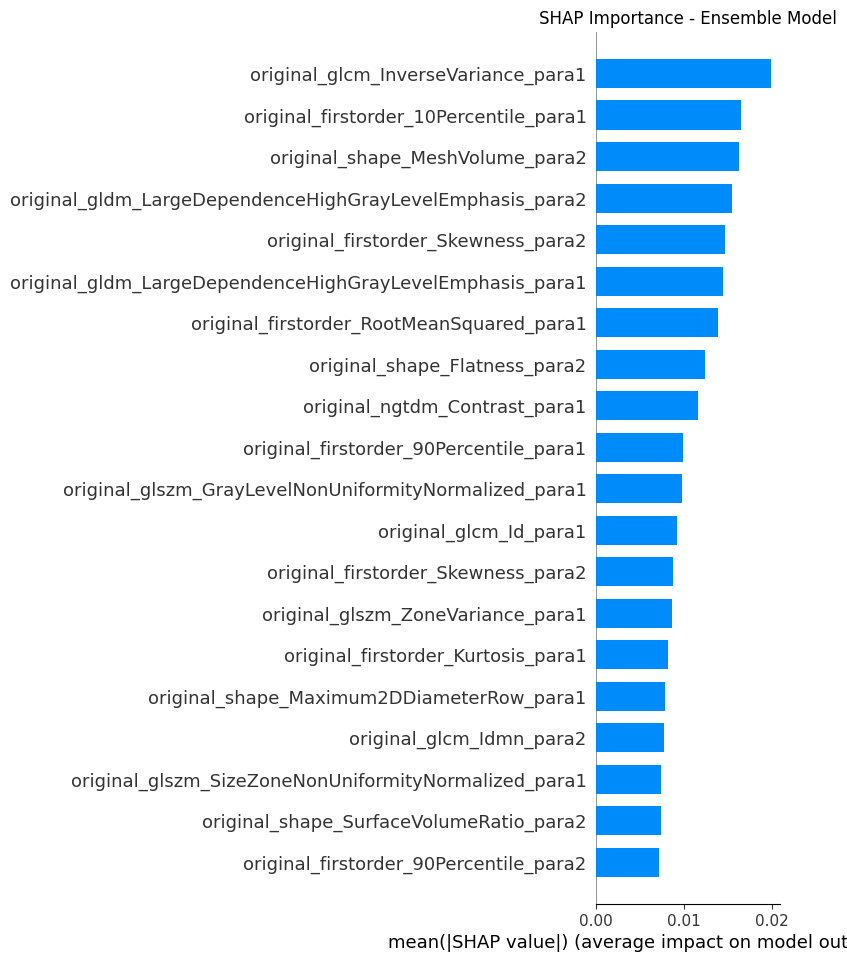

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sksurv.metrics import concordance_index_censored
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt
import joblib

data = f 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_c_index = 0
best_weights = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index].drop(['time', 'event'], axis=1), data.iloc[test_index].drop(['time', 'event'], axis=1)
    y_train, y_test = data.iloc[train_index][['time', 'event']], data.iloc[test_index][['time', 'event']]

    y_train_struct = Surv.from_dataframe("event", "time", y_train)
    y_test_struct = Surv.from_dataframe("event", "time", y_test)

    models = {
        "RSF": RandomSurvivalForest(n_estimators=100, max_depth=5, random_state=42),
        "HGB": HistGradientBoostingClassifier(random_state=42),
        "ET": ExtraTreesClassifier(n_estimators=100, random_state=42),
        "GB": GradientBoostingClassifier(random_state=42),
    }

    for name, model in models.items():
        if name == "RSF":
            model.fit(X_train, y_train_struct)
        else:
            model.fit(X_train, y_train_struct["event"])

    def evaluate_ensemble_performance(weights):
        risk_scores = np.zeros(len(X_test))
        for (name, model), weight in zip(models.items(), weights):
            if name == "RSF":
                risk_scores += weight * model.predict(X_test)
            else:
                risk_scores += weight * model.predict_proba(X_test)[:, 1]
        return concordance_index_censored(
            y_test_struct["event"], y_test_struct["time"], risk_scores
        )[0]

    weight_grid = np.array(np.meshgrid(*[np.linspace(0, 1, 11) for _ in models])).T.reshape(-1, len(models))
    weight_grid = weight_grid[np.isclose(weight_grid.sum(axis=1), 1)] 

    for weights in weight_grid:
        c_index = evaluate_ensemble_performance(weights)
        if c_index > best_c_index:
            best_c_index = c_index
            best_weights = weights

print(f"Best weights: {dict(zip(models.keys(), best_weights))}")
print(f"Best C-index: {best_c_index:.4f}")

X = data.drop(['time', 'event'], axis=1)
y_struct = Surv.from_dataframe("event", "time", data)

for name, model in models.items():
    if name == "RSF":
        model.fit(X, y_struct)
    else:
        model.fit(X, y_struct["event"])


for name, model in models.items():
    joblib.dump(model, f"{name}_model.pkl")
joblib.dump(best_weights, "best_weights.pkl")

ensemble_risk_scores = np.zeros(len(X))
for (name, model), weight in zip(models.items(), best_weights):
    if name == "RSF":
        ensemble_risk_scores += weight * model.predict(X)
    else:
        ensemble_risk_scores += weight * model.predict_proba(X)[:, 1]

num_features = X.shape[1]  
required_max_evals = 2 * num_features + 1

def shap_ensemble_predict(X):
    risk_scores = np.zeros(len(X))
    for (name, model), weight in zip(models.items(), best_weights):
        if name == "RSF":
            risk_scores += weight * model.predict(X)
        else:
            risk_scores += weight * model.predict_proba(X)[:, 1]
    return risk_scores

explainer_ensemble = shap.Explainer(shap_ensemble_predict, X, max_evals=required_max_evals)
shap_values_ensemble = explainer_ensemble(X)

shap.summary_plot(shap_values_ensemble, X, plot_type="bar", show=False)
plt.title("SHAP Importance - Ensemble Model")
plt.show()


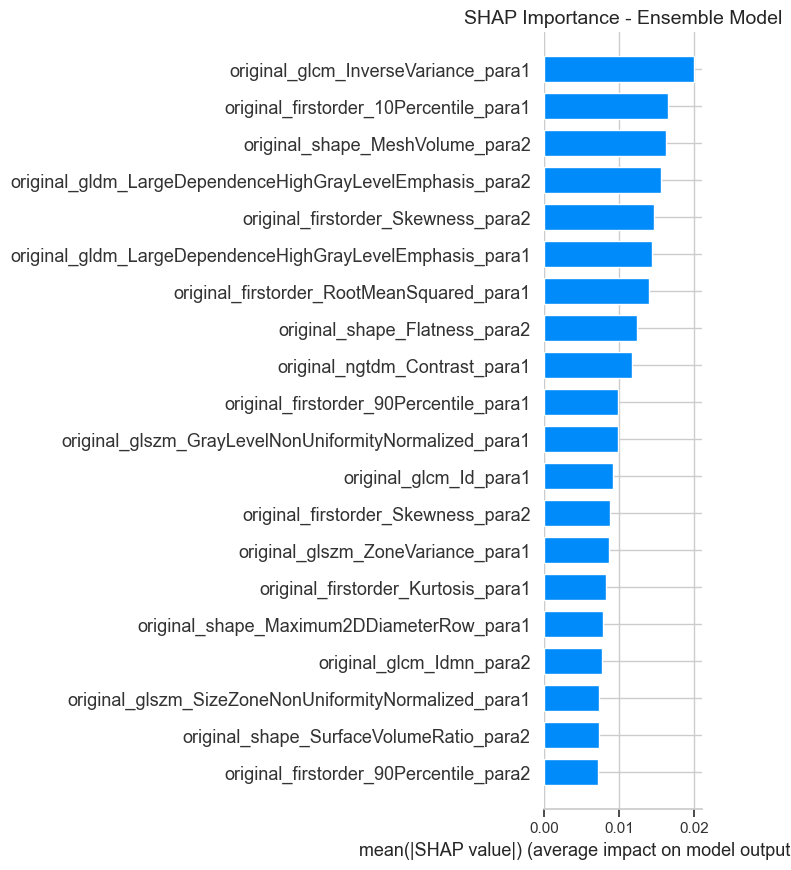

In [154]:
import matplotlib.pyplot as plt
import shap

shap.summary_plot(shap_values_ensemble, X, plot_type="bar", show=False)
plt.title("SHAP Importance - Ensemble Model")

plt.tight_layout(pad=3.0)

plt.savefig('shap.jpg', dpi=600)

plt.show()

In [100]:
shap_mean_values = np.abs(shap_values_ensemble.values).mean(axis=0)
important_features = X.columns[np.argsort(shap_mean_values)[::-1]]  # 按重要性排序

print("Top SHAP Selected Features:")
print(important_features)

Top SHAP Selected Features:
Index(['original_glcm_InverseVariance_para1',
       'original_firstorder_10Percentile_para1',
       'original_shape_MeshVolume_para2',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_para2',
       'original_firstorder_Skewness_para2',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_para1',
       'original_firstorder_RootMeanSquared_para1',
       'original_shape_Flatness_para2', 'original_ngtdm_Contrast_para1',
       'original_firstorder_90Percentile_para1',
       ...
       'original_shape_SurfaceArea_para2',
       'original_glrlm_RunLengthNonUniformityNormalized_para2',
       'original_glszm_HighGrayLevelZoneEmphasis_para2',
       'original_firstorder_Entropy_para2',
       'original_gldm_GrayLevelVariance_para2',
       'original_glcm_SumSquares_para2',
       'original_gldm_SmallDependenceEmphasis_para1',
       'original_glszm_ZoneVariance_para2', 'original_glcm_SumAverage_para1',
       'original_glrlm_RunLengthNonUniform

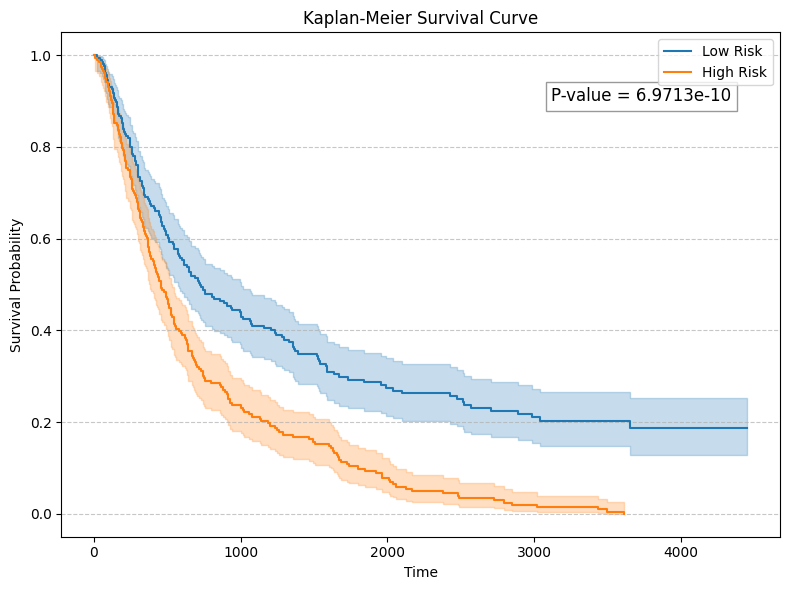

In [101]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

high_risk_threshold = np.median(ensemble_risk_scores)
low_risk_group = ensemble_risk_scores <= high_risk_threshold
high_risk_group = ensemble_risk_scores > high_risk_threshold

sample_names = data.index 
risk_labels = ["Low Risk" if score <= high_risk_threshold else "High Risk" for score in ensemble_risk_scores]

output_df = pd.DataFrame({"Sample Name": sample_names, "Risk Group": risk_labels})
output_df.to_csv("sample_risk_groups.csv", index=False)

times = data["time"]
events = data["event"]

kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

kmf_low.fit(times[low_risk_group], event_observed=events[low_risk_group], label="Low Risk")
kmf_high.fit(times[high_risk_group], event_observed=events[high_risk_group], label="High Risk")

results = logrank_test(
    times[low_risk_group], times[high_risk_group],
    event_observed_A=events[low_risk_group],
    event_observed_B=events[high_risk_group]
)
p_value = results.p_value

plt.figure(figsize=(8, 6))
kmf_low.plot_survival_function(ci_show=True)
kmf_high.plot_survival_function(ci_show=True)

plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend(loc="best")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.text(
    0.7 * times.max(), 0.9, f"P-value = {p_value:.4e}",
    fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

plt.tight_layout()
plt.savefig('KM_plot.jpg', dpi=600)
plt.show()

In [141]:
ensemble_risk_scores1 = pd.DataFrame(ensemble_risk_scores)
ensemble_risk_scores1

,0
0,0.993285
1,0.993559
2,0.958458
3,0.951321
4,0.988710
...,...
402,0.979442
403,0.985594
404,0.974790
405,0.973315


In [142]:
cli = pd.read_csv('NSCLC-Radiomics-Lung1.clinical-version3-Oct-2019.csv')
cli = cli.loc[:,['PatientID',"clinical.T.Stage","Clinical.N.Stage","Clinical.M.Stage"]]
cli.columns = ['Sample Name',"clinical.T.Stage","Clinical.N.Stage","Clinical.M.Stage"]
g = pd.merge(output_df,cli,on='Sample Name',how='inner')
g[0]=ensemble_risk_scores1
g

,Sample Name,Risk Group,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,0
0,LUNG1-222,High Risk,3.0,3,0,0.993285
1,LUNG1-242,High Risk,4.0,3,0,0.993559
2,LUNG1-277,Low Risk,2.0,3,0,0.958458
3,LUNG1-332,Low Risk,1.0,0,0,0.951321
4,LUNG1-038,High Risk,2.0,3,0,0.988710
...,...,...,...,...,...,...
402,LUNG1-369,High Risk,1.0,3,0,0.979442
403,LUNG1-071,High Risk,4.0,2,0,0.985594
404,LUNG1-324,High Risk,4.0,0,0,0.974790
405,LUNG1-123,Low Risk,4.0,2,0,0.973315


In [143]:
g.to_csv('cli_risk.csv',index=False)

In [138]:
feature_importance = f[important_features.values[:21]]
feature_importance = feature_importance.T.drop_duplicates().T
feature_importance.to_csv('feature_importance.csv',index=False)
feature_importance

,original_glcm_InverseVariance_para1,original_firstorder_10Percentile_para1,original_shape_MeshVolume_para2,original_gldm_LargeDependenceHighGrayLevelEmphasis_para2,original_firstorder_Skewness_para2,original_gldm_LargeDependenceHighGrayLevelEmphasis_para1,original_firstorder_RootMeanSquared_para1,original_shape_Flatness_para2,original_ngtdm_Contrast_para1,original_firstorder_90Percentile_para1,original_glszm_GrayLevelNonUniformityNormalized_para1,original_glcm_Id_para1,original_glszm_ZoneVariance_para1,original_firstorder_Kurtosis_para1,original_shape_Maximum2DDiameterRow_para1,original_glcm_Idmn_para2,original_glszm_SizeZoneNonUniformityNormalized_para1,original_shape_SurfaceVolumeRatio_para2,original_firstorder_90Percentile_para2,original_shape_SurfaceVolumeRatio_para1
SampleID,,,,,,,,,,,,,,,,,,,,
LUNG1-222,2.825993,-0.967419,1.937796,-1.171537,-0.299858,-1.166825,1.823600,0.520856,-1.043698,-2.529901,1.046928,2.191392,-0.049723,-0.257978,1.334224,-1.779153,-2.484012,-0.112961,-2.479827,-0.113235
LUNG1-242,-0.480494,1.967777,0.973277,1.556973,-1.313059,1.551073,-1.174176,-1.094044,-0.603899,1.255785,-0.210060,-0.421320,-0.049917,-0.044878,-0.073177,0.567601,0.069448,-0.666765,1.254434,-0.665516
LUNG1-277,-0.727110,1.083942,-0.437778,-0.208222,0.292702,-0.207256,-1.053529,-0.276088,-0.276520,0.503132,-0.219557,-0.642969,-0.049937,-0.046687,-0.628579,0.564015,0.794866,-0.381890,0.512006,-0.381425
LUNG1-332,0.089323,-0.683356,-1.045375,-1.118121,1.362701,-1.113617,1.239916,1.204989,-0.654298,-1.901157,-0.077074,-0.015738,-0.049923,0.649007,-0.874337,0.064922,0.461965,-0.054545,-1.859624,-0.054979
LUNG1-038,0.313994,2.503886,-0.634991,-1.097832,0.406250,-1.093406,-2.037445,-0.228397,-0.898295,0.523257,-0.099955,0.307960,-0.049880,-0.034014,-1.080601,0.233947,-0.728153,-0.631441,0.531857,-0.630290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-369,0.057641,-0.133472,-0.312119,1.119496,-0.387825,1.115297,-0.182644,0.753925,0.804481,0.422635,-0.179730,0.017902,-0.049887,-0.409070,-1.037536,0.209622,-0.400954,-0.725045,0.432601,-0.723637
LUNG1-071,-0.198346,-0.282391,-0.170754,1.619439,-0.125009,1.613296,-0.192977,0.759172,-0.372793,0.945869,-0.225820,-0.198336,-0.049929,-0.120064,2.883935,0.808581,0.467990,4.775556,0.948728,4.761850
LUNG1-324,0.556593,2.700459,-0.741274,2.131727,-2.725526,2.123591,-1.777009,-0.167711,-0.755591,0.526132,0.138331,0.506873,-0.049892,1.057172,-0.153116,0.708626,-0.519547,0.181904,0.534692,0.180821


In [166]:
cli_all = pd.read_csv('NSCLC-Radiomics-Lung1.clinical-version3-Oct-2019.csv')
cli_all = cli_all.set_index('PatientID')
cli_all['age'] = (cli_all['age'] > 65).astype(int)
cli_all = pd.get_dummies(cli_all, columns=['Overall.Stage','gender'], prefix='Category')
cli_all.loc[feature_importance.index.values,:].to_csv('./AdaSMCCA-main/cli.csv')
cli_all

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Histology,Survival.time,deadstatus.event,Category_I,Category_II,Category_IIIa,Category_IIIb,Category_female,Category_male
PatientID,,,,,,,,,,,,,
LUNG1-001,1,2.0,3,0,large cell,2165,1,False,False,False,True,False,True
LUNG1-002,1,2.0,0,0,squamous cell carcinoma,155,1,True,False,False,False,False,True
LUNG1-003,1,2.0,3,0,large cell,256,1,False,False,False,True,False,True
LUNG1-004,1,2.0,1,0,squamous cell carcinoma,141,1,False,True,False,False,False,True
LUNG1-005,1,4.0,2,0,squamous cell carcinoma,353,1,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-418,0,2.0,0,0,adenocarcinoma,346,1,True,False,False,False,False,True
LUNG1-419,1,4.0,1,0,squamous cell carcinoma,2772,0,False,False,False,True,False,True
LUNG1-420,1,2.0,1,0,squamous cell carcinoma,2429,1,False,True,False,False,False,True


In [159]:
feature_importance.to_csv('./AdaSMCCA-main/feature.csv')

In [169]:
feature_importance.columns

Index(['original_glcm_InverseVariance_para1',
       'original_firstorder_10Percentile_para1',
       'original_shape_MeshVolume_para2',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_para2',
       'original_firstorder_Skewness_para2',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_para1',
       'original_firstorder_RootMeanSquared_para1',
       'original_shape_Flatness_para2', 'original_ngtdm_Contrast_para1',
       'original_firstorder_90Percentile_para1',
       'original_glszm_GrayLevelNonUniformityNormalized_para1',
       'original_glcm_Id_para1', 'original_glszm_ZoneVariance_para1',
       'original_firstorder_Kurtosis_para1',
       'original_shape_Maximum2DDiameterRow_para1', 'original_glcm_Idmn_para2',
       'original_glszm_SizeZoneNonUniformityNormalized_para1',
       'original_shape_SurfaceVolumeRatio_para2',
       'original_firstorder_90Percentile_para2',
       'original_shape_SurfaceVolumeRatio_para1'],
      dtype='object')